In [1]:
import numpy as np
import xarray as xr
import os.path as op
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import xrft
from dask.diagnostics import ProgressBar
import dask.array as dsar
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir= '/swot/SUM02/channel_seasonality/'

In [3]:
ys, dy = (4,1)
dt = 4e1
# df = 288
ts = int(360*86400*(ys+.5)/dt)
te = int(ts+360*86400*dy/dt)
print(ts,te)

3499200 4276800


In [4]:
dsraw = open_mdsdataset(op.join(ddir,'Dalma_Dar02km/runs'), 
#                         grid_dir=op.join(ddir,'02km_grid'),
                        iters=range(ts,te+int(2160*15),int(2160*15)), 
                        prefix=['W'], delta_t=dt
                        ).sel(YC=slice(5.5e5,14.5e5),YG=slice(5.5e5,14.5e5))
dsraw

/home/takaya/xmitgcm/xmitgcm/mds_store.py:236: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:236: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along the dimensions None. A

<xarray.Dataset>
Dimensions:  (XC: 500, XG: 500, YC: 450, YG: 451, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 25)
Coordinates:
  * XC       (XC) >f4 1000.0 3000.0 5000.0 7000.0 ... 995000.0 997000.0 999000.0
  * YC       (YC) >f4 551000.0 553000.0 555000.0 ... 1447000.0 1449000.0
  * XG       (XG) >f4 0.0 2000.0 4000.0 6000.0 ... 994000.0 996000.0 998000.0
  * YG       (YG) >f4 550000.0 552000.0 554000.0 ... 1448000.0 1450000.0
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 ... -2625.955 -2757.325 -2912.665
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 ... -2689.32 -2825.33 -3000.0
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 ... -2689.32 -2825.33 -3000.0
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 ... -2562.59 -2689.32 -2825.33
    rA       (YC, XC) >f4 dask.array<chunksize=(450, 500), meta=np.ndarray>
    dxG      (YG, XC) >f4 dask.array<chunksize=(451, 500), meta=np.ndarray>
    dyG      (YC, XG) >f4 dask.array<chunksize=(450, 500), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(450, 500), meta=np.ndarray>
    rAz      (YG, XG) >f4 dask.array<chunksize=(451, 500), meta=np.ndarray>
    dxC      (YC, XG) >f4 dask.array<chunksize=(450, 500), meta=np.ndarray>
    dyC      (YG, XC) >f4 dask.array<chunksize=(451, 500), meta=np.ndarray>
    rAw      (YC, XG) >f4 dask.array<chunksize=(450, 500), meta=np.ndarray>
    rAs      (YG, XC) >f4 dask.array<chunksize=(451, 500), meta=np.ndarray>
    drC      (Zp1) float64 dask.array<chunksize=(77,), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(76,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(76,), meta=np.ndarray>
    PHrefF   (Zp1) >f4 dask.array<chunksize=(77,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(76, 450, 500), meta=np.ndarray>
    hFacW    (Z, YC, XG) >f4 dask.array<chunksize=(76, 450, 500), meta=np.ndarray>
    hFacS    (Z, YG, XC) >f4 dask.array<chunksize=(76, 451, 500), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(76, 450, 500), meta=np.ndarray>
    maskW    (Z, YC, XG) bool dask.array<chunksize=(76, 450, 500), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(76, 451, 500), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 1620 days 1635 days ... 1965 days 1980 days
Data variables:
    W        (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 76, 450, 500), meta=np.ndarray>

In [5]:
dsom = xr.open_mfdataset('/swot/SUM01/takaya/omega/womegaSnap_ho-qg_02km*.nc',
                        concat_dim='time')
dsom

<ipython-input-5-01af6e286c86>:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  dsom = xr.open_mfdataset('/swot/SUM01/takaya/omega/womegaSnap_ho-qg_02km*.nc',
/home/takaya/.conda/envs/uptodate/lib/python3.8/site-packages/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  combined = auto_combine(


<xarray.Dataset>
Dimensions:  (XC: 500, YC: 450, Zp1: 200, time: 25)
Coordinates:
  * XC       (XC) float32 1000.0 3000.0 5000.0 ... 995000.0 997000.0 999000.0
  * Zp1      (Zp1) float64 0.0 -15.08 -30.15 ... -2.97e+03 -2.985e+03 -3e+03
  * YC       (YC) float32 551000.0 553000.0 555000.0 ... 1447000.0 1449000.0
Dimensions without coordinates: time
Data variables:
    wa_ho    (time, Zp1, YC, XC) float64 dask.array<chunksize=(1, 200, 450, 500), meta=np.ndarray>
    wa_qg    (time, Zp1, YC, XC) float64 dask.array<chunksize=(1, 200, 450, 500), meta=np.ndarray>

In [20]:
w = (dsraw.W * xr.DataArray(np.hanning(len(dsraw.YC)), 
                            dims=['YC'])).sel(YC=slice(6e5,14e5)).reset_coords(['rA','Depth'], drop=True)
w

<xarray.DataArray (time: 25, Zl: 76, YC: 400, XC: 500)>
dask.array<getitem, shape=(25, 76, 400, 500), dtype=float64, chunksize=(1, 76, 400, 500), chunktype=numpy.ndarray>
Coordinates:
  * YC       (YC) float64 6.01e+05 6.03e+05 6.05e+05 ... 1.397e+06 1.399e+06
  * XC       (XC) >f4 1000.0 3000.0 5000.0 7000.0 ... 995000.0 997000.0 999000.0
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 ... -2562.59 -2689.32 -2825.33
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 1620 days 1635 days ... 1965 days 1980 days

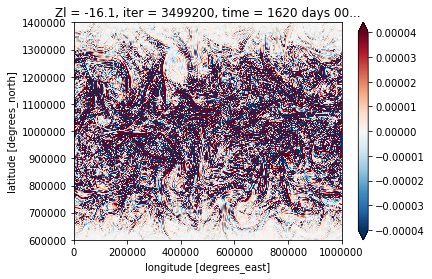

In [25]:
w[0,9].plot(vmax=4e-5)

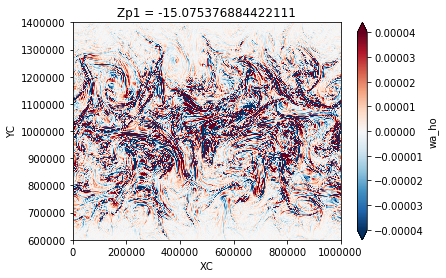

In [15]:
dsom.wa_ho[0,1].sel(YC=slice(6e5,14e5)).plot(vmax=4e-5)

In [21]:
with ProgressBar():
    womf = xrft.power_spectrum(dsom.wa_ho.sel(YC=slice(6e5,14e5)), 
                               dim=['XC'], density=False, detrend='constant'
                              ).mean(['time','YC']).compute()
    wf = xrft.power_spectrum(w, dim=['XC'], density=False, detrend='constant').mean(['time','YC']).compute()
womf

[########################################] | 100% Completed | 29.1s
[########################################] | 100% Completed | 12.2s


<xarray.DataArray 'rechunk-merge-e2780455e0f5d2d432142dd3e1d5c370' (Zp1: 200, freq_XC: 500)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10137290e-09, 1.59548848e-08, 1.65435426e-08, ...,
        1.59400282e-08, 1.65435426e-08, 1.59548848e-08],
       [3.01102668e-09, 4.07209656e-08, 4.14886100e-08, ...,
        4.01820771e-08, 4.14886100e-08, 4.07209656e-08],
       ...,
       [1.39133681e-11, 6.92765358e-11, 7.04539590e-11, ...,
        7.06824355e-11, 7.04539590e-11, 6.92765358e-11],
       [4.64556721e-12, 2.27394816e-11, 2.30714620e-11, ...,
        2.32829976e-11, 2.30714620e-11, 2.27394816e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])
Coordinates:
  * Zp1              (Zp1) float64 0.0 -15.08 -30.15 ... -2.985e+03 -3e+03
  * freq_XC          (freq_XC) float64 -0.00025 -0.000249 ... 0.000248 0.000249
    freq_XC_spacing  float64 1e-06

(1e-08, 0.0001)

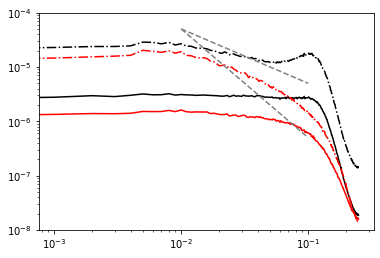

In [62]:
fig, ax = plt.subplots()
ax.plot(wf.freq_XC*1e3, wf[9], c='k')
ax.plot(womf.freq_XC*1e3, womf[1], c='r')
ax.plot(wf.freq_XC*1e3, wf[22], c='k', ls='-.')
ax.plot(womf.freq_XC*1e3, womf[7], c='r', ls='-.')

ax.plot(np.logspace(-5,-4,10)*1e3, 5e-15*np.logspace(-5,-4,10)**-2, c='grey', ls="--")
ax.plot(np.logspace(-5,-4,10)*1e3, 5e-10*np.logspace(-5,-4,10)**-1, c='grey', ls='--')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-8,1e-4])